<a href="https://colab.research.google.com/github/daka13/HowLLMsWork/blob/main/Copy_of_pile_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore pretraining data from the Pile

## Upload a data file

Use the "folder" icon to the left to upload your Pile `.jsonl` file to the cloud server if you are using a hosted colab notebook. You can also download this notebook to run locally.

The `%%capture` statement means that output from the cell will not be displayed.

In [ ]:
%%capture
!pip install transformers

In [ ]:
from transformers import AutoTokenizer
import json
from tqdm import tqdm
from collections import Counter

from IPython.display import display, Markdown

Change this variable to match the number of your filename. The `@param` statement in the comment after a variable declaration makes an editable form appear on the right.

In [ ]:
input_filename = "pile_02.jsonl"  # @param {type:"string"}

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-160m")


We often want to handle very large files as a stream, reading one line at a time and never keeping more than that one line in memory. The `.jsonl` format is designed to make this easy: rather than the entire file being one JSON array or object that has to be processed as a single unit, each line is an individual JSON object.

In this case, the files are small enough that we can just load everything into an array in memory.

In [ ]:
documents = []

with open(input_filename) as reader:
    for line in reader:
        documents.append(json.loads(line))

With the documents loaded from the file, use the tokenizer to generate and save the token representation of each document.

This can be slow, it may run for about a minute. The `tqdm` package provides a progress bar for iterators.

In [ ]:
for doc in tqdm(documents):
  text = doc["text"]
  # use the tokenizer to convert text to token IDs, and save this for later
  doc["tokens"] = tokenizer(text)["input_ids"]

100%|██████████| 7500/7500 [00:52<00:00, 142.45it/s]


## Browse documents

Each file has 7500 documents. Try to look through as many as you can to get a sense of what they're about, how long they are, and the differences between the source corpora.

Ideas: What is the longest document you can find? What is the shortest? Are there documents that have many repeated tokens? Reminder: `len(set(...))` will give you the number of distinct values in a list.

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7]
for k in enumerate(x[2:4]):
  print(k)

(0, 3)
(1, 4)


In [ ]:
start = 0
docs_to_display = 100

output = "| Index | Tokens | Source | Text |\n| -- | --: | :---- | :---- |\n"

for i, doc in enumerate(documents[start:(start + docs_to_display)]):

  doc_id = i + start

  # replace two "new line" characters with an arrow
  short_text = doc["text"][:120].replace("\n", "↲").replace("\r", "↲")

  # replace markdown, HTML, and latex math markers with "entities" that display the same character
  #  but won't be interpreted as formatting
  short_text = short_text.replace("|", "&#124;").replace("<", "&lt;").replace("$", "&#36;")

  token_count = len(doc['tokens'])
  if "meta" in doc and "pile_set_name" in doc["meta"]:
      source = doc["meta"]["pile_set_name"]
  else:
      source = "unknown"

  output += f"| {doc_id} | {token_count} | {source} | {short_text} |\n"

display(Markdown(output))

| Index | Tokens | Source | Text |
| -- | --: | :---- | :---- |
| 0 | 124 | HackerNews | ↲The Coders Programming Themselves Out of a Job - xcubic↲https://www.theatlantic.com/technology/archive/2018/10/agents-o |
| 1 | 136 | OpenWebText2 | Per information provided to Soc Takes, the initial franchise expansion fee for USL is now &#36;7 million. This is an increas |
| 2 | 55 | Github | package:↲  name: conda-build-test-extra-metadata↲  version: 1.0↲↲test:↲  requires:↲    - pyyaml↲↲extra:↲  custom: metada |
| 3 | 2974 | Pile-CC | WHO WE ARE↲↲Knowledge Capital Group [KCG] is a boutique business strategy and organizational transformation consulting f |
| 4 | 538 | Pile-CC | Medication Disposal↲↲Medication↲↲Flushing medication down the toilet is now discouraged as it poses a threat to human he |
| 5 | 457 | Pile-CC | Omega Speedmaster: Four Of The Best↲↲As we approach the end of the year (and celebrations for the Speedmaster’s 60th ann |
| 6 | 1413 | StackExchange | Q:↲↲How to search the Play Store by permissions?↲↲How do I specify that I do not wish to see apps that require for examp |
| 7 | 485 | NIH ExPorter | The polyamines putrescine, spermidine and spermine have been implicated in the regulation of cellular proliferation and  |
| 8 | 274 | PubMed Abstracts | Association of polymorphism in ICAM-1 (K469E) and cytology parameters in patients' initial blood test with acute ischemi |
| 9 | 568 | USPTO Backgrounds | The present disclosure relates to an imaging device such as a capsule endoscope, which performs transmission and recepti |
| 10 | 1055 | Pile-CC | China Advances Film Industry Law, Cracks Down on "Western Values"↲↲Topics addressed in the draft of China's film industr |
| 11 | 655 | StackExchange | Q:↲↲Java8: how to copy values of selected fields from one object to other using lambda expression↲↲I'm trying to underst |
| 12 | 149 | Pile-CC | Jefferson County, NY Pioneers↲↲PIONEER COMBS FAMILY↲↲1. GEORGE W. COMBS was born Oct 1806 in NY. By 1850, he was living  |
| 13 | 499 | PubMed Abstracts | Abscisic acid and osmoticum prevent germination of developing alfalfa embryos, but only osmoticum maintains the synthesi |
| 14 | 11837 | Github | // mksyscall_aix_ppc64.pl -aix -tags aix,ppc64 syscall_aix.go syscall_aix_ppc64.go↲// Code generated by the command abov |
| 15 | 702 | Pile-CC | 17 July 2019↲↲Barrick Gold Corporation president and chief executive officer Mark Bristow says the company is hopeful th |
| 16 | 34 | OpenWebText2 | Find free video streams online and enjoy them on your Android phone or tablet: Mobdro constantly searches the web for th |
| 17 | 1252 | OpenWebText2 | Once upon a time, in the deeper reaches of your cable box, you could stumble across a show called “Mystery Science Theat |
| 18 | 271 | FreeLaw |                                    Fourth Court of Appeals↲                                          San Antonio, Texas↲ |
| 19 | 279 | OpenWebText2 | Maura J. Kiefer is an experienced appellate, land use, civil litigation, and municipal attorney in Massachusetts and Flo |
| 20 | 280 | OpenWebText2 | Stan Lee needed a real-life superhero to find and return his lost dog. Enter the immortal football legend, Jim Brown, wh |
| 21 | 478 | StackExchange | Q:↲↲Groovy: Plucking values out of a Map and into a Set↲↲Groovy here. I have a class Fizz:↲@Canonical↲class Fizz {↲  Int |
| 22 | 583 | Pile-CC | So, what happens if I have a camp. It takes 10 to set-up with another 20 showing up later to help run it. But as ticket  |
| 23 | 270 | OpenWebText2 | Adobo, silogs, and halo-halo reign supreme in this stretch of the Peninsula known as Little Manila↲↲With the largest con |
| 24 | 3223 | ArXiv | ---↲abstract: 'The trigger system of the Surface Detector (SD) of the Pierre Auger Observatory is described, from the id |
| 25 | 208 | PubMed Abstracts | [Evaluation of an Experimental Production Wireless Dose Monitoring System for Radiation Exposure Management of Medical S |
| 26 | 197 | OpenWebText2 | A new trailer for Automation has made its way to the web. As you may recall, the game allows you to design a vehicle fro |
| 27 | 139 | Pile-CC | Employee Rights↲↲Workers across the world — including Australia — are being denied important basic human rights, a new g |
| 28 | 22765 | PubMed Central | Summary of guidance for PrEP providers {#jve11-sec-0001}↲======================================↲↲  --------------------- |
| 29 | 121 | Github | #!{{pkgPathFor "core/bash"}}/bin/bash↲↲set -e↲↲exec 2>&1↲↲# Call the script to block until user accepts the MLSA via the |
| 30 | 269 | PubMed Abstracts | Antibacterial activity of gentamicin-bonded gelatin-sealed polyethylene terephthalate vascular prostheses.↲To create an  |
| 31 | 1362 | Pile-CC | Wisconsin transportation officials have chosen a bright, white-and-red color scheme for the exterior of its new high-spe |
| 32 | 1586 | OpenWebText2 | Premier League chief executive defends new £5.14bn dealDismisses criticism of how windfall will be distributedScudamore: |
| 33 | 684 | OpenWebText2 | Critics slammed “60 Minutes” for airing an interview Sunday with Eddie Gallagher, a Navy SEAL accused of war crimes in I |
| 34 | 120 | Pile-CC | Popular Apps↲↲New Free Interface Apps For Samsung Galaxy S WiFi 4.2↲↲Kaomoji: Japanese Emoticons - large emoticons store |
| 35 | 229 | StackExchange | Q:↲↲Degrees of comparison↲↲I believe, both variants are possible:↲↲friendlier / more friendly; and  ↲the friendliest / t |
| 36 | 604 | Pile-CC | Popularity↲↲Customer↲↲Brand↲↲Expert↲↲Software↲↲The Betfair aimed at helping players feel sports or they choose. Search a |
| 37 | 92 | Pile-CC | Select help topic↲↲Use speed dialling - HTC One S↲↲Read help info↲↲A contact can be saved on a number key and dialled by |
| 38 | 49 | Github | #include &lt;linux/bio.h>↲↲void dummy(struct bio *bio)↲{↲	bio->bi_status = BLK_STS_IOERR;↲	bio_endio(bio);↲}↲ |
| 39 | 1122 | USPTO Backgrounds | The present disclosure relates to non-volatile storage.↲Semiconductor memory has become increasingly popular for use in  |
| 40 | 414 | Pile-CC | During↲Defexpo India 2014 held New Delhi, from February 6 to 9, 2014 Navy Recognition↲received some updates on the Indig |
| 41 | 747 | OpenWebText2 | Jennifer Smith, Daily Mail, September 21, 2018↲↲Google employees discussed leveraging their influence over the internet  |
| 42 | 1490 | Pile-CC | Re: Press Publish, etc↲↲November 29th, 2012↲↲Share:↲↲Dear Editor,↲↲Sir Strothard posits that “Blogging will be to the de |
| 43 | 19605 | FreeLaw | 718 F.2d 365↲4 ITRD 2217, 218 U.S.P.Q. 678, 1 Fed.Cir. (T) 90↲SSIH EQUIPMENT S.A., Appellant,v.UNITED STATES INTERNATION |
| 44 | 2017 | OpenWebText2 | People have been worrying about the world’s pending overpopulation for more than two centuries. Robert Thomas Malthus so |
| 45 | 798 | OpenWebText2 | Bitcoin, the world's first peer-to-peer digital currency, fell below &#36;3 on Monday. That represents a 90 percent fall sin |
| 46 | 837 | Pile-CC | During investigation it was also noticed that during the year 2006-07, annual turnover of the said contractor was only R |
| 47 | 515 | StackExchange | Q:↲↲Why doesn't my code write to a text file?↲↲I want to know why my code doesn't write to a text file, JVM doesn't thro |
| 48 | 39 | Github | package io.buoyant.namer↲↲import com.twitter.finagle.Namer↲↲/** For better java compatibility */↲abstract class JNamer e |
| 49 | 248 | StackExchange | Q:↲↲Getting into android networking, HTTP library preference?↲↲I'm finding at least 3 different ways to submit an HTTP r |
| 50 | 536 | NIH ExPorter | The role of procoagulant hemostatic factors in atherogenesis has been enigmatic. Increased plasma concentrations of proc |
| 51 | 1247 | FreeLaw | ↲175 Mich. App. 637 (1989)↲438 N.W.2d 272↲In re SHAWBOOSE↲Docket No. 107605.↲Michigan Court of Appeals.↲Decided January  |
| 52 | 301 | Github | #pragma once↲↲enum LocationServiceStatus↲{↲    kLocationServiceStopped,↲    kLocationServiceInitializing,↲    kLocationS |
| 53 | 231 | HackerNews | ↲↲An extremely high-altitude plume seen at Mars’ morning terminator - user_235711↲http://www.nature.com/nature/journal/v |
| 54 | 4065 | Github | # Translation of Odoo Server.↲# This file contains the translation of the following modules:↲# * partner_identification↲ |
| 55 | 65 | Pile-CC | Will not Bicycle on the Street Without having Studying these 10 Security Guidelines A whole lot of men and women genuine |
| 56 | 1526 | USPTO Backgrounds | 1. Field of the Invention↲The present invention relates to a printing plate automatic exposing device which places a pri |
| 57 | 1738 | Github | ---↲layout: base↲title:  'Statistics of obl in UD_Moksha-JR'↲udver: '2'↲---↲↲## Treebank Statistics: UD_Moksha-JR: Relat |
| 58 | 48 | Pile-CC | Anti-war organizations are protesting the NBC premier of a "reality" TV show called "Stars Earn Stripes" that features B |
| 59 | 258 | Pile-CC | Rainbow Song↲↲Rainbow Song↲↲This track is very optimistic and cheerful mood. Cute vocal melody, energetic orchestration. |
| 60 | 6705 | FreeLaw | 803 F.2d 638↲231 U.S.P.Q. 730, 1986 Copr.L.Dec. P 26,023↲UNITED STATES of America, Plaintiff-Appellee,v.Tom GOSS, Defend |
| 61 | 235 | Enron Emails | It is good for me.↲↲DG    3-9573↲↲↲   ↲	Enron North America Corp.↲	↲	From:  Irena D Hogan                           12/1 |
| 62 | 598 | NIH ExPorter | The goal of the MSK SPORE in Lymphoma is to improve the cure rate of patients with diffuse large B cell lymphoma, throug |
| 63 | 1794 | Pile-CC | For our websites to work correctly, it is necessary to have Javascript turned on.↲↲We use Cookies to improve our service |
| 64 | 3732 | DM Mathematics | e (-91)/(-2)*134/469.↲13↲What is (1/(-6))/(-15*20/5400)?↲3↲Evaluate (3 - 0) + (49/7 - -1).↲11↲Calculate 99/(-17) + 13/(2 |
| 65 | 609 | PubMed Abstracts | Immunohistochemical characterization of squamous differentiation and morular metaplasia in uterine endometrioid adenocar |
| 66 | 183 | Wikipedia (en) | Shobana Jeyasingh Dance↲↲Shobana Jeyasingh Dance is a British dance company based in London and founded in 1989 by the c |
| 67 | 1102 | Pile-CC | Google-powered algorithm set to modernise insurance brokering↲↲Algorithm, developed in conjunction with UCL, drives a Ll |
| 68 | 610 | StackExchange | Q:↲↲Compile time default values for static members of static struct defined inside classes↲↲I would like to have a desig |
| 69 | 212 | StackExchange | Q:↲↲Sql Server Performance Degradation in moving from 2005 to 2008↲↲I have sql server 2005 setup for my performance benc |
| 70 | 26 | OpenWebText2 | Time is ripe for world’s second-largest economy to cut the ties that bind yuan to the US dollar, expert says |
| 71 | 948 | OpenWebText2 | Marmite hater? We're so sorry - Lola's Cupcakes have ruined some perfectly decent chocolate, eggs and butter for you. Sh |
| 72 | 160 | PubMed Abstracts | Aquaporins in the Eye.↲The major part of the eye consists of water . Continuous movement of water and ions between the o |
| 73 | 471 | Github | # Sourcegraph development documentation↲↲This documentation is for developers contributing to Sourcegraph itself.↲↲Sourc |
| 74 | 14157 | PubMed Central | Related literature   {#sec1}↲====================↲↲For the synthesis and biological activity of the title compound, see; |
| 75 | 198 | StackExchange | Q:↲↲Replacing fragment does not work properly↲↲I am replacing an fragment with the following code. Why isn't onCreateVie |
| 76 | 503 | Pile-CC | 80 Online Tools, References, and Resources↲↲11/10/11 Update: We have an additional 30 plus tools, references, and resour |
| 77 | 2679 | Pile-CC | My story is - about a decade ago, my wife, new dog and I were returning from an out of state contract. We'd stopped in a |
| 78 | 6263 | PubMed Central | Background {#Sec1}↲==========↲↲Desmopressin (1-deamino-8-[d]{.smallcaps}-arginine vasopressin or dDAVP) is a peptide ana |
| 79 | 310 | StackExchange | Q:↲↲Auto eager load navigation property in the DbContext↲↲Is there a way to tamper with the DbContext in order to auto e |
| 80 | 2028 | OpenWebText2 | Cameras in phones are ubiquitous. Few of us see the need to carry a dedicated device for taking photos or videos anymore |
| 81 | 70 | Pile-CC | METAphorisms↲↲For META magazine, Berlin, METAphorisms is a visual meditation on classical metaphysical vocabulary accomp |
| 82 | 145 | Wikipedia (en) | Gedocarnil↲↲Gedocarnil (INN) is an anxiolytic of the β-carboline class related to abecarnil. It is registered as an anxi |
| 83 | 241 | Github | ﻿&lt;?xml version="1.0" encoding="utf-8"?>↲&lt;examples>↲  &lt;example>↲    &lt;code>Add-AWSLoggingListener -Name MyAWSLogs -LogFile |
| 84 | 52 | Pile-CC | Specifications and features:Fits 3/8" ribsGreen front sightFront dot can only be seen when perfectly alignedSnaps over r |
| 85 | 152 | Pile-CC | Dettagli prodotto↲↲It's time for Minimates to go back to the future! DST is revisiting their popular Back to the Future  |
| 86 | 303 | Pile-CC | Gazprom, Naftogaz Ukrainy resume talks on gas debt↲↲The European Union has expressed concern over the stand-off↲↲OAO Gaz |
| 87 | 424 | USPTO Backgrounds | 1. Field of the Invention↲The present invention relates to an organic light emitting display, and more particularly, to  |
| 88 | 1097 | USPTO Backgrounds | Silicon-on-insulator technology is becoming increasingly important for high performance thin film transistors, solar cel |
| 89 | 254 | Pile-CC | The Woodlands Diver Kassidy Cook Commits to Stanford↲↲STANFORD, California, August 25. WHILE the athletics administratio |
| 90 | 1373 | USPTO Backgrounds | Pertinent areas of the classification manual concerned with this type of invention are, among others, Class 208, Subclas |
| 91 | 848 | USPTO Backgrounds | 1. Field of the Invention↲The present invention relates to an ultrasonic vibrator and an ultrasonic motor using the ultr |
| 92 | 718 | StackExchange | Q:↲↲sending script files through json format in Python↲↲I'm working on IMB IOT application.It basically allow to sends c |
| 93 | 262 | StackExchange | Q:↲↲Какие объекты можно помещать в сессию?↲↲Может ли помещаемый в HttpContext.Current.Session объект содержать в себе вл |
| 94 | 451 | Pile-CC | Blogs by date "June 2014"↲↲The jQuery javascript library has been integrated into Exponent since v2.2.0 in an effort to  |
| 95 | 380 | StackExchange | Q:↲↲How to start a block scalar with a blank line?↲↲When I try and start a block scalar in YAML with a blank line, it co |
| 96 | 1069 | Pile-CC | AwesomeBy Davidon 3/25/2014↲↲David would recommend this product to a friend↲↲This a great meter,I am color blind so thes |
| 97 | 860 | OpenWebText2 | "Levensgevaarlijk", noemt Stephan Wevers, voorzitter van Brandweer Nederland en commandant bij de brandweer Twente, het  |
| 98 | 378 | PubMed Abstracts | Mutation of tyrosine-350 impairs the coupling of the beta 2-adrenergic receptor to the stimulatory guanine nucleotide bi |
| 99 | 494 | NIH ExPorter | Aging is associated with progressive lose of skeletal muscle mass and strength referred to as sarcopenia, a significant  |


In [ ]:
print(documents[3]['meta']['pile_set_name'])

source_list = []

for document in documents:
  if document['meta']['pile_set_name'] not in source_list:
    source_list.append(document['meta']['pile_set_name'])
print(source_list)

Pile-CC
['HackerNews', 'OpenWebText2', 'Github', 'Pile-CC', 'StackExchange', 'NIH ExPorter', 'PubMed Abstracts', 'USPTO Backgrounds', 'FreeLaw', 'ArXiv', 'PubMed Central', 'Enron Emails', 'DM Mathematics', 'Wikipedia (en)', 'YoutubeSubtitles', 'EuroParl', 'Ubuntu IRC', 'OpenSubtitles', 'Books3', 'PhilPapers', 'BookCorpus2', 'Gutenberg (PG-19)']


In [ ]:
source_counts = {}
for item in source_list:
  if item not in source_counts:
    source_counts[item] = 0
for document in documents:
  source_counts[document['meta']['pile_set_name']] += 1
"""
for document in documents:
  if document['meta']['pile_set_name'] not in source_list:
    source_list.append(document['meta']['pile_set_name'])
print(source_list)
"""
"""
    if document['meta']['pile_set_name'] not in source_count:
        source_counts[source] =0
        print(document['meta']['pile_set_name'])
    source_counts[source] += 1
"""
print(source_counts)

{'HackerNews': 48, 'OpenWebText2': 1183, 'Github': 652, 'Pile-CC': 1901, 'StackExchange': 1045, 'NIH ExPorter': 57, 'PubMed Abstracts': 1044, 'USPTO Backgrounds': 417, 'FreeLaw': 148, 'ArXiv': 69, 'PubMed Central': 188, 'Enron Emails': 29, 'DM Mathematics': 71, 'Wikipedia (en)': 591, 'YoutubeSubtitles': 11, 'EuroParl': 5, 'Ubuntu IRC': 2, 'OpenSubtitles': 25, 'Books3': 7, 'PhilPapers': 3, 'BookCorpus2': 3, 'Gutenberg (PG-19)': 1}


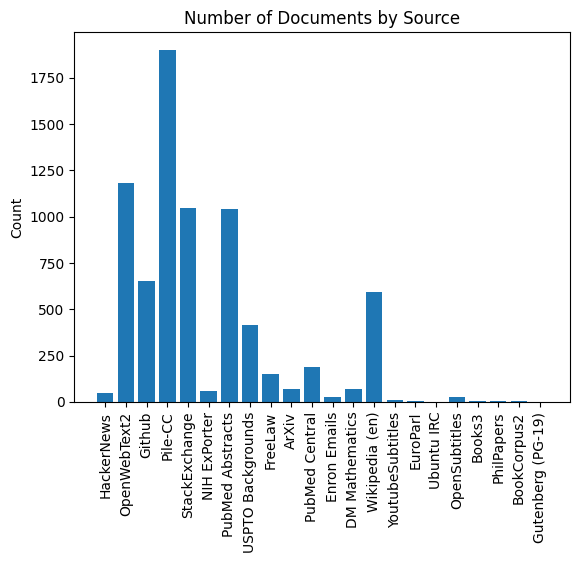

In [ ]:
import matplotlib.pyplot as plt
labels = list(source_counts.keys())
values = list(source_counts.values())

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_ylabel('Count')
ax.set_title('Number of Documents by Source')
plt.xticks(rotation=90)
plt.show()

In [ ]:
token_counts = {}
for item in source_list:
  if item not in token_counts:
    token_counts[item] = 0
for document in documents:
  token_counts[document['meta']['pile_set_name']] += len(document['tokens'])
print(token_counts)

{'HackerNews': 49529, 'OpenWebText2': 1039037, 'Github': 1209879, 'Pile-CC': 1859429, 'StackExchange': 647078, 'NIH ExPorter': 27123, 'PubMed Abstracts': 291563, 'USPTO Backgrounds': 337648, 'FreeLaw': 487471, 'ArXiv': 1052840, 'PubMed Central': 1550256, 'Enron Emails': 9823, 'DM Mathematics': 268026, 'Wikipedia (en)': 459171, 'YoutubeSubtitles': 85318, 'EuroParl': 92479, 'Ubuntu IRC': 150533, 'OpenSubtitles': 191957, 'Books3': 760090, 'PhilPapers': 32674, 'BookCorpus2': 318969, 'Gutenberg (PG-19)': 4653}


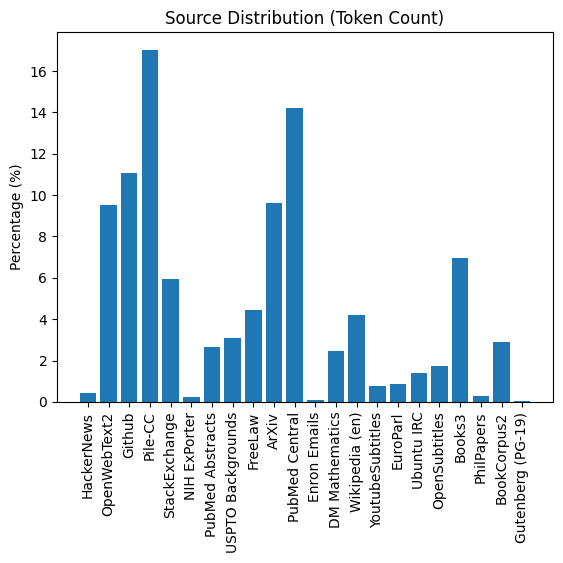

In [ ]:
import matplotlib.pyplot as plt
total = sum(token_counts.values())
percents = {k: v/total * 100 for k, v in token_counts.items()}

labels = list(percents.keys())
values = list(percents.values())
fig, ax = plt.subplots()
plt.ylabel("Percentage (%)")
ax.bar(labels, values)

#ax.set_ylabel('Count')
ax.set_title('Source Distribution (Token Count)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(documents[22]["text"])

So, what happens if I have a camp. It takes 10 to set-up with another 20 showing up later to help run it. But as ticket sales commence people keep getting bumped into tiers they can't afford, or get bumped altogether and the event is sold out. So, what do you do if you've been getting your equipment ready all year for this camp, and all of a sudden 5-6-7 people are left out? Scrap the camp? Those who got tickets go while your friends who didn't stay at home with a little resentment? Sell the tickets and no one goes?

I really believe this is not going to work out well for a lot of people.

You set the limit for what you can afford in the main sale, so there's no "getting bumped into tiers they can't afford." And the main sale happens in January, so "all of a sudden" is 7-8 months before the event, and should be a surprise to no camp that's been getting their equipment ready all year.

Lowest tier tickets have been selling out almost immediately for the last few years. Those who couldn'

## Count tokens

This cell displays the most frequent tokens, replacing newline with an arrow so it displays more cleanly.

In [ ]:
# count tokens
token_counter = Counter()

for doc in tqdm(documents):
  token_counter.update(doc["tokens"])

for id, count in token_counter.most_common(500):
  token = tokenizer.decode(id).replace("\n", "↲")
  if len(token) > 5:
    print(f"{count}\t'{token}'")

100%|██████████| 7500/7500 [00:05<00:00, 1407.48it/s]


15078	'                        '
13964	' which'
13656	'        '
9920	' their'
9348	'      '
9142	' would'
9068	' about'
8663	' there'
7969	' other'
7072	'            '
6050	' first'
6021	' these'
5802	' could'
5749	' after'
5494	' between'
5272	' should'
5244	' using'
5151	' where'
5050	' people'
4952	' because'
4448	' through'
3913	' right'
3860	' before'
3823	' under'
3810	' class'
3692	' years'
3681	' being'
3657	' different'
3602	' those'
3582	'                '
3522	' function'
3474	' number'
3272	' found'
3264	' while'
3241	' think'
3112	' system'
3038	'          '
3035	' study'
3002	' without'
2998	' three'
2947	'return'
2946	'mathcal'
2941	' cells'
2906	'       '
2903	' during'
2829	' still'
2793	' patients'
2713	' against'
2692	' value'
2667	' court'
2655	' around'
2654	' following'
2645	'Category'
2591	' going'
2563	' order'
2484	' group'
2454	' second'
2436	' world'
2410	' information'
2404	' another'
2390	' results'
2383	' within'
2360	'mathbb'
2353	' since'
2344	' state'


In [ ]:
token_counter = Counter()

for doc in tqdm(documents):
  if doc['meta']['pile_set_name'] == "HackerNews":
    token_counter.update(doc["tokens"])

for id, count in token_counter.most_common(100):
  token = tokenizer.decode(id).replace("\n", "↲")
  print(f"{count}\t'{token}'")

100%|██████████| 7500/7500 [00:00<00:00, 202363.99it/s]


4853	'↲'
1880	'.'
1080	' the'
1071	','
800	' to'
667	' a'
666	'-'
611	'/'
538	' of'
484	' I'
459	' is'
450	' and'
434	' it'
395	' that'
335	' in'
280	' for'
276	'~~~'
259	''s'
252	' you'
250	' on'
223	'://'
214	'------'
212	' be'
188	''t'
188	'I'
184	' not'
178	' "'
177	'_'
166	' ('
163	' with'
159	' have'
157	'?'
156	' but'
154	'"'
153	')'
153	' this'
143	'com'
142	':'
133	'http'
131	' are'
126	' as'
119	' or'
119	' your'
119	' an'
117	's'
113	' can'
112	' at'
108	' they'
106	' was'
105	'>'
102	' like'
100	' -'
93	' if'
89	'https'
89	' by'
89	' would'
87	' from'
85	' my'
84	'www'
84	'the'
83	''m'
82	'['
81	' more'
79	' about'
79	' just'
77	' some'
76	' so'
70	'The'
70	' what'
70	' me'
68	' get'
67	' there'
66	'2'
64	'1'
64	'!'
63	' do'
61	' really'
61	' use'
60	' The'
60	'↲↲'
60	' It'
60	'j'
59	'and'
59	' their'
59	' think'
58	' has'
57	''re'
56	'p'
55	'k'
55	' people'
55	' all'
55	').'
55	' up'
54	' will'
54	' which'
54	' one'
54	'org'
53	' how'
52	'%'
51	' very'


What else can you count or analyze? Which sources are most common? Are there tokens that are more represented in one source than another? Does Github have fewer distinct token types than Wikipedia?